In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomTreesEmbedding
import pandas as pd
from sklearn import manifold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/fc1_cluster.csv', index_col=0)

In [3]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [6]:
df_50 = TruncatedSVD(n_components=50, random_state=42).fit_transform(df)
df_50 = pd.DataFrame(df_50, index=df.index)

In [7]:
sample = df_50.sample(n=5000, random_state=42)
del df_50

In [8]:
def plot_embed(X, title=None):
    x_min, x_max = np.min(X,0), np.max(X,0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.scatter(X[:, 0], X[:, 1])
    if title is not None:
        plt.title(title)

In [12]:
for comp in xrange(2,30):
    isomap = manifold.Isomap(n_neighbors=30, n_components=2).fit(sample)
    print isomap.reconstruction_error()

901.180399781
901.180399781
901.180399781
901.180399781
901.180399781


KeyboardInterrupt: 

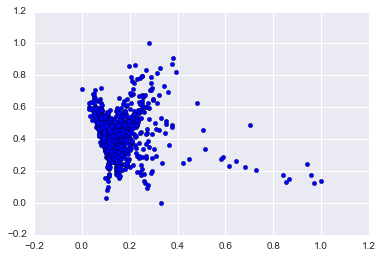

In [23]:
standard = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, random_state=42, method='standard')
X_mlle = standard.fit_transform(sample)
plot_embed(X_mlle)
print standard.reconstruction_error_

-7.26972582217e-15


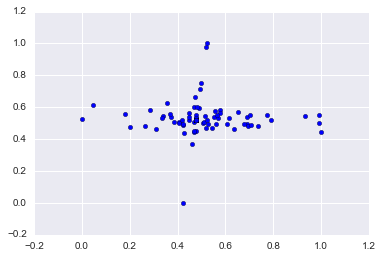

In [25]:
hessian = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, random_state=42, method='hessian',
                                         eigen_solver='dense')
X_hess = hessian.fit_transform(sample)
print hessian.reconstruction_error_
plot_embed(X_hess)

3.93005054821e-15


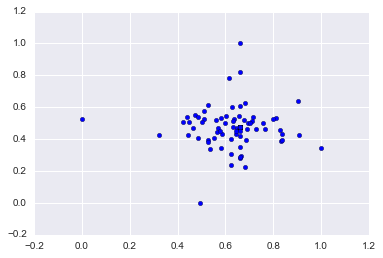

In [28]:
ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, random_state=42, method='ltsa', 
                                        eigen_solver='dense')
X_ltsa = ltsa.fit_transform(sample)
print ltsa.reconstruction_error_
plot_embed(X_ltsa)

In [32]:
for i in xrange(2, 10):
    hessian = manifold.LocallyLinearEmbedding(n_neighbors=55, n_components=i, random_state=42, method='hessian',
                                         eigen_solver='dense')
    X_hess = hessian.fit_transform(sample)
    print i, " ", hessian.reconstruction_error_

2   4.10798386629e-14
3   -5.2012671396e-14
4   -3.74225648849e-14
5   1.75443221861e-14
6   -3.36067371423e-14
7   -3.77554487289e-14
8   -5.66472753649e-14


In [35]:
for i in xrange(2, 10):
    ltsa = manifold.LocallyLinearEmbedding(n_neighbors=55, n_components=i, random_state=42, method='ltsa', 
                                        eigen_solver='dense')
    X_ltsa = ltsa.fit_transform(sample)
    print i, " ", ltsa.reconstruction_error_

2   -5.47930487491e-14
3   -8.75855949831e-14
4   -3.74225648849e-14
5   -2.13923945004e-14
6   -5.09206976499e-15
7   2.75304906352e-14
8   -1.26852350805e-13
9   6.83522428183e-14


In [ ]:
for i in xrange(2, 10):
    isomap = manifold.Isomap(n_neighbors=55, n_components=i, random_state=42, eigen_solver='dense')
    X_iso = isomap.fit_transform(sample)
    print i, " ", isomap.reconstruction_error()

In [ ]:
for i in xrange(2, 10):
    mds = manifold.MDS(n_components=i, random_state=42, n_jobs=-1)
    X_mds = mds.fit_transform(sample)
    print i, ' ', mds.stress_